# Работа 1.4.1. Изучение колебаний физического маятника
----
----


## Цель работы и оборудование
--------

### Цель

1) проверить справедливость формулы для периода колебаний физического маятника и определить значение ускорения свободного падения
2) оценить погрешность прямых и косвенных измерений и конечного результата

### Оборудование

металлический стержень с опорной призмой, дополнительный груз, закреплённая на стене консоль, подставка с острой гранью для определения цента масс маятника, электронный счётчик колебаний, линейки металлические различной длины, штангенциркуль, электронные весы

## Ход работы

----------

In [34]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd


### Предварительное вычисление g по колебанию маятника без прикрепленной массы

In [35]:
a = 0.245 # (м) расстояние от центра стержня до точки подвеса
l = 1     # (м) длина стержня


Измерим время t, за которое маятник без груза совершит n колебаний  
Получим период T_no_mass по формуле:  

$$ T = \frac{t}{n} $$

In [36]:
t_no_mass = 30.73
n = 20
T_no_mass = t_no_mass/n
T_no_mass


1.5365

$$ T = 2 \pi \sqrt{\frac{l^{2}/12 + a^{2}}{ga}}

$$ g = 4 \pi^{2} \frac{l^{2}/12 + a^{2}}{T^{2}a} $$

In [37]:
g_no_mass = 4 * (np.pi ** 2) * ((l**2) / 12 + a**2) / ((T_no_mass**2) * a)
g_no_mass


9.784789034387599

#### Погрешности


Погрешность вычисления времени равна (цена деления секундомера)
$$ \sigma_{t} = 0.01 \text{с}$$    

Погрешность измерения длины (2 цены деления линейки, так как не были зафиксированы ни правый ни левый концы)
$$ \sigma_{l} = 0.002 \text{м} $$

In [38]:
delta_t = 0.01 # (c)
sigma_T_no_mass = delta_t / n
sigma_T_no_mass


0.0005

$\sigma_{T} = 0.0005 ~c$

In [39]:
sigma_l = 0.002 # (м) погрешность измерения длины


Вычислим погрешность g_no_mass:

$$ \sigma_{g} = 4\pi^{2} \sqrt{ (\frac{l}{6T^{2}a}\sigma_{l})^{2} + (-\frac{l^{2}}{12 T^{2} a^{2}}\sigma_{a} + \frac{1}{T^{2}}\sigma_{a})^{2} + (-2\frac{l^{2}/12 + a^{2}}{T^{3}a} \sigma_{T})^{2}}$$

$\sigma_{a} = \sigma_{l}$ 
т к измерялись одинаково

In [40]:
first_bracket = sigma_l * l / (6 * T_no_mass**2 * a)

second_bracket = sigma_l * (1/T_no_mass**2 - l**2 / (12 * (T_no_mass**2)*(a**2)))

third_bracket = sigma_T_no_mass * 2 * ((l**2) / 12 + (a**2)) / ((T_no_mass**3) * a)

sigma_g_no_mass = 4 * np.pi**2 * np.sqrt( (first_bracket) ** 2 + (second_bracket) ** 2 + (third_bracket) ** 2 )

sigma_g_no_mass


0.026959908799765498

$\sigma_{g} = 0.0270$ м / $с^{2}$

In [41]:
epsilon_g = sigma_g_no_mass / g_no_mass * 100
epsilon_g


0.2755287692459978

Получаем g:  
$$ g = 9.785 \pm 0.027 ~\text{м} / c^{2} (\epsilon_{g} \approx 0.28 \%)$$

### Снятие измерений и выявление теоретической зависимости

<img src="ustanovka.png" alt="Alternative text" />
<p>Маятник с дополнительным грузом

Для каждого измерения мы знаем:  
y     - расстояние от призмы до начала груза  
y ист - расстояние от призмы до центра груза  
xц    - расстояние от призмы до центра масс маятника без груза  
n     - число совершенных колебаний  
T     - время, за которое было совершено n колебаний  
J0    - момент инерции маятника  
mг    - масса груза  


Новая погрешность измерения длины складывается из инструментальной погрешности и погрешности метода (длина измерялась длинной линейкой на весу, линейку было невозможно приложить к стержню вплотную изза стержня и груза)  
$$ \sigma_{l} = 0.002 + 0.005 = 0.007 ~\text{м} $$

In [42]:
sigma_l = np.sqrt(0.002**2 + 0.005**2)
sigma_l
# TODO


0.005385164807134504


При известном g, T вычисляется по формуле:

\begin{equation}
T = 2\pi\sqrt{\frac{J_0 + m_{\text{г}}y^2}{gMx_{\text{ц}}}},
\end{equation}

$$ M = m_{\text{пр}} + m_{0} $$
$$ J_{0} = \frac{m_{0} l^{2}}{12} + m_{0} a^{2} $$


$$ g = 4\pi^{2} \frac{J_{0} + m_{\text{г}} y^{2}}{T^{2} M x_{\text{ц}}}$$

#### Загрузка данных измерений

In [43]:
init_df = pd.read_excel("periods.xlsx", usecols="H:M", skiprows=0, nrows=9)
init_df


,"y, м","y ист, м","Xц, м","t, c",n.1,"T, с"
0,0.499,0.508,0.295,44.76,30,1.492000
1,0.468,0.477,0.285,44.27,30,1.475667
2,0.439,0.448,0.279,43.88,30,1.462667
3,0.411,0.420,0.271,43.49,30,1.449667
4,0.380,0.389,0.265,43.16,30,1.438667
5,0.350,0.359,0.257,42.89,30,1.429667
6,0.317,0.326,0.249,42.66,30,1.422000
7,0.287,0.296,0.243,42.49,30,1.416333
8,0.260,0.269,0.236,42.43,30,1.414333


По формуле для вычисления положения центра масс $x_{\text{ц}}$:
$$ x_{\text{ц}} = \frac{m_{0} x_{\text{ц0}} + m_{\text{г}} y }{M} $$

Не будем пользоваться данными прямых измерений $x_{\text{ц}}$ т.к. у них большая погрешность т.к. при их измерении линейка была на весу и задевала груз и призму  
Измерение $y$ было более точным, т.к. линейка прикладывалась вплотную.

In [44]:
m_prism = 0.0783 # (kg)
m_stick = 0.8914 # (kg) масса стержня
m_addms = 0.3163 # (kg)


In [45]:
m0 = m_stick + m_prism
M = m0 + m_addms

J_0 = m0 * (l**2) / 12 + m0 * (a ** 2)\

m0, M, J_0


(0.9697, 1.286, 0.13901457583333332)

Учтем влияние призмы на положение центра масс стержня с призмой:  
$$ x_{\text{ц0}} = \frac{a_{prism} * m_{prism} + a * m_{stick}}{m_{0}}$$

In [46]:
a_prism = 0.01 # TODO TODO
x_centr_0 =  (a_prism*m_prism + a * m_stick)/(m0)# 0.245 - mistake value
x_centr_0


0.226024543673301

In [47]:
y_arr   = list(init_df["y ист, м"])

x_centr = [(m0*x_centr_0 + m_addms*y)/(M) for y in y_arr]
T_mass  = list(init_df["T, с"])


#### Непосредственное вычисление g (для стержня с дополнительной массой) по среднему значению

$$ g = 4\pi^{2} \frac{J_{0} + m_{\text{г}} y^{2}}{T^{2} M x_{\text{ц}}}$$

In [48]:
def g_calc(J_0, m_addms, y, T_mass, M, x_centr):
    return 4 * (np.pi ** 2) * (J_0 + m_addms * (y**2)) / ((T_mass ** 2) * M * x_centr)


In [49]:
g_arr = [g_calc(J_0, m_addms, y_arr[i], T_mass[i], M, x_centr[i]) for i in range(len(y_arr))]
g_arr = [round(g_arr[i], 5) for i in range(len(g_arr))]
g_arr


[10.30119,
 10.33634,
 10.35446,
 10.39596,
 10.41586,
 10.43618,
 10.45754,
 10.48982,
 10.50179]

#### Вычисление погрешности среднего g

Стандартное отклонение 
$$ \sigma_{g} = \sqrt{\frac{1}{N-1} \sum{(\langle g \rangle - g_{i})^{2}}} $$

In [50]:
def std_deviation(arr):
    sum = 0

    av_arr = np.sum(arr) / len(arr)

    for i in range(len(arr)):
        sum += (arr[i] - av_arr)**2

    sum /= (len(arr) - 1)

    return np.sqrt(sum)


In [51]:
g_deviation = std_deviation(g_arr)
sigma_g = g_deviation / np.sqrt(len(g_arr))
epsilon_g_mean = sigma_g / np.mean(g_arr) * 100
np.mean(g_arr), sigma_g, epsilon_g_mean


(10.409904444444445, 0.02307101440908477, 0.22162561176435489)

Окончательный результат по данному методу:
$$g = 10.411 \pm 0.023 ~\text{м}/\text{с}^{2} ~(\epsilon \approx 0.22 \%)$$

Такой результат не может считаться надежным т.к. справедливость теоретической зависимости не была проверена. Кроме того, усреднение разнородных измерений в общем случае не является корректным.

### Определение $g$ по углу наклона графика $T^{2}x_{\text{ц}}(y^{2})$

Если внимательно посмотреть на формулу для $g$:
$$ g = 4\pi^{2} \frac{J_{0} + m_{\text{г}} y^{2}}{T^{2} M x_{\text{ц}}}$$

$$T^{2}x_{\text{ц}} = \frac{4 \pi^{2} m_{\text{г}}}{gM} (\frac{J_{0}}{m_{\text{г}}} + y^{2})$$

Можно заметить, что если построить график $T^{2}x_{\text{ц}}(y^{2})$, можно вычислить $g$ через угловой коэффициент

In [52]:
y_sqr = [round(y**2, 4) for y in y_arr]                         # аналог оси x
T_sqr_x_centr = [t**2 * x_c for t, x_c in zip(T_mass, x_centr)] # аналог оси y

N = len(y_sqr)


По формуле для вычисления положения центра масс $x_{\text{ц}}$:
$$ x_{\text{ц}} = \frac{m_{0} x_{\text{ц0}} + m_{\text{г}} y }{M} $$

Погрешность $x_{\text{ц}}$ найдем как погрешность случайной величины

Погрешность $y^{2}$:
$$\sigma_{y^{2}} = 2y\sigma_{l}$$

Погрешность $A = T^{2} x_{\text{ц}}$ (не учитывам малую погрешность времени):
$$ \sigma_{A} = T^{2} \sigma_{x_{\text{ц}}} $$


$$\sigma_{A} = \sqrt{(2 T x_{\text{ц}} \sigma_{T})^{2} + (T^{2} \sigma_{x_{\text{ц}}})^{2}}$$

In [53]:
sigma_x_centr = 1 / N * np.sqrt(np.sum([(np.mean(x_centr) - x_i)**2 for x_i in x_centr]))

sigma_y_sqr = [2 * y_i * sigma_l for y_i in y_sqr]

sigma_T_sqr_x_centr = [np.sqrt((t**2 * sigma_x_centr)**2 + (2 * t * x * 0.01)**2) for t, x in zip(T_mass, x_centr)]


Аппроксимировать будем по МНК:
$$k = \frac{\overline{uv}- \bar{u}\bar{v}}{\bar{v^2}-\bar{v}^2}, \quad b = \bar{u} - k \bar{v}$$

In [54]:
v = y_sqr
u = T_sqr_x_centr

mu = np.mean(u) # средее
mv = np.mean(v)
mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
mu2 = np.mean([u_i**2 for u_i in u])
muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
k = (muv - mu * mv) / (mv2 - mv**2)
b = mu - k * mv
print("k = ", k, ", b = ", b)

# то что выше эквивалентно
np.polyfit(v, u, 1)


k =  0.9916820083089324 , b =  0.40109553023573663


array([0.99168201, 0.40109553])

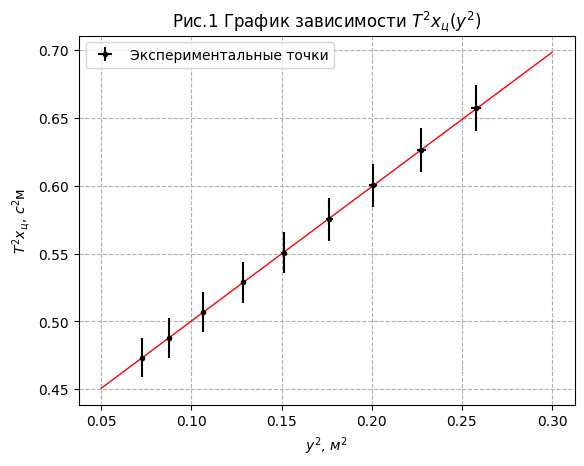

In [55]:
plt.figure()
plt.ylabel("$T^{2}x_{ц}$, $c^{2}$м")
plt.xlabel("$y^{2}$, ${м}^{2}$")
plt.title('Рис.1 График зависимости $T^{2}x_{ц}(y^{2})$')
plt.grid(True, linestyle = '--')
plt.errorbar(y_sqr, T_sqr_x_centr, xerr=sigma_y_sqr, yerr = sigma_T_sqr_x_centr, fmt = ".k", label = "Экспериментальные точки")
x = np.array([0.05, 0.3])
plt.plot(x, k*x + b, "-r", linewidth = 1)
plt.legend()


In [56]:
k


0.9916820083089324

$$k = \frac{4 \pi^{2} m_{\text{г}}}{gM} $$

$$ g = \frac{4 \pi^{2} m_{\text{г}}}{kM} $$ 

In [57]:
g_graph = (4 * np.pi**2 * m_addms) / (k * M)
g_graph


9.791416529625119

#### Погрешности

Вычислим случайные погрешности определения коэффициентов прямой: 
\begin{equation}
\sigma_k = \sqrt{\frac{1}{N-2} \left(\frac{\overline{y^2}-\bar{y}^2}{\overline{x^2} - \bar{x}^2}-k^2\right)},\qquad \sigma_b = \sigma_k \sqrt{\overline{x^2}}
\end{equation}
и из них --- случайную погрешность измерения $g$ и $L$.

In [58]:
N = len(v) # число точек
sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
sigma_b = sigma_k * np.sqrt(mv2)
sigma_g = sigma_k / k * g_graph
sigma_L = 1 * np.sqrt( (sigma_b / b)**2 + (sigma_g / g_graph)**2 )
print("sigma_k = %.3f, sigma_b = %.3f" % (sigma_k, sigma_b))
print("sigma_g = %.3f, sigma_L = %.3f" % (sigma_g, sigma_L))


sigma_k = 0.002, sigma_b = 0.000
sigma_g = 0.023, sigma_L = 0.003


In [59]:
epsilon_g_graph = sigma_g / g_graph * 100 # %
epsilon_g_graph


0.23259480619000475

По графику получаем
$$ g = 9.791 \pm 0.023 ~\text{м}/\text{с}^{2} ~(\epsilon \approx 0.23 \%)$$ 

### Затухающие колебания 


Отклонив стержень на $\approx 10 \degree $ от вертикали, мы отпустили его, запустив автоматический счетчик колебаний


Амплитуда уменьшилась вдвое через 505.61 сек, через 329 полных колебаний  
Это число, конечно, приблизительное, т к изменение амплитуды вдвое мы определяли на глаз по настенной шкале

$$ e^{-\gamma n T} = 0.5 $$ 
(т.к. амплитуда уменьшилась вдвое)

$$ \gamma = -\ln{0.5} / (nT)$$

In [60]:
n_exp = 329
T_exp = 505.61
koeff = 0.5
gamma = - np.log(koeff) / n_exp / T_exp
gamma


4.166907964732632e-06

$$ \tau = \frac{1}{\gamma} $$

In [61]:
tau_exp = 1/gamma
tau_exp


239986.10203625282

$$ Q = \pi \frac{\tau}{T} $$

In [62]:
Q = np.pi * tau_exp / T_exp
Q


1491.1464866611466

## Вывод

Мы вычислили три значения g для двух опытов (для одного из них двумя способами).


g при колебании стержня без дополнительной массы:  
$$ g = 9.785 \pm 0.027 ~\text{м} / c^{2} (\epsilon_{g} \approx 0.28 \%)$$

g полученное усреднением g для колебаний стержня с грузом для разных положений груза:
$$g = 10.411 \pm 0.023 ~\text{м}/\text{с}^{2} ~(\epsilon \approx 0.22 \%)$$

g по углу наклона графика:
$$ g = 9.791 \pm 0.023 ~\text{м}/\text{с}^{2} ~(\epsilon \approx 0.23 \%)$$ 

Ну вроде как на Земле живем

----

Очевидно, что Земля, после достижения максимума во время моего второго опыта, начала терять гравитацию.  
Это значит, что в скором времении ее не хватит на удержание атмосферы и планета станет похожа на Марс.  
 

Пока никто ничего не знает у меня есть время на подготовку: я запаковал уже около 5 литров кислорода в бутылки в своей комнате, чтобы официально остаться последним человеком на Земле, когда весь кислород улетит в космос.


Когда я останусь один на Земле, я, с двумя гирями на голове (чтобы не лопнуть от перепада давления, очевидно), медленно посасывая кислород из бутылки Боржоми, буду думать, где ученые ошиблись, когда посчитали g = 9.81 м/с^2

Когда же g станет равен нулю, я оттолкнусь от Земли и улечу на Луну, куда, очевидно, прилетел весь кислород с Земли. По прибытии я сброшу с головы гири, посажу кукурузу и пересниму фильм Марсианин, только назову его Лунянин, чтобы показать Голливуду, что мы тоже можем в большое кино, которое посмотрят все люди мира, то есть я.